In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# 下載資料庫

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
# 整理輸入資料

x_train = x_train.reshape(60000, 28,28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
# 整理輸出資料

from keras.utils import np_utils

In [10]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
# 建構模型
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adadelta, Adam

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(16,(3,3),padding="same",input_shape=(28,28,1),activation="relu"))

In [15]:
model.add(MaxPool2D(pool_size=(2,2)))

In [16]:
model.add(Conv2D(32,(3,3),padding="same",activation="relu"))

In [17]:
model.add(MaxPool2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())
model.add(Dense(30,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                47070     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1240      
__________

In [21]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 87s 1ms/step - loss: 0.5939 - acc: 0.7872: 0s - loss: 0.5958 - acc: 
Epoch 2/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.3747 - acc: 0.8661
Epoch 3/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3258 - acc: 0.8830
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3003 - acc: 0.8921
Epoch 5/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2798 - acc: 0.8985
Epoch 6/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2652 - acc: 0.9036
Epoch 7/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2529 - acc: 0.9078
Epoch 8/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2386 - acc: 0.9120
Epoch 9/10
60000/60000 [==============================] - 78s 1ms/step 

In [22]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 12s 1ms/step


In [23]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]:.5f}')

測試資料的 loss: 0.26486
測試資料的正確率: 0.90460


In [24]:
predict = model.predict_classes(x_test)

In [25]:
labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

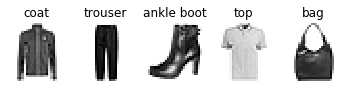

In [26]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(labelNames[predict[pick[i]]])
    plt.axis("off")